<a href="https://colab.research.google.com/github/Thamizhini-K-R/Customer-Satisfaction-Prediction/blob/main/customers_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving customer_support_tickets.csv to customer_support_tickets.csv


In [ ]:
df = pd.read_csv('customer_support_tickets.csv')


In [ ]:
df.shape
df.head()
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [ ]:
df.drop(['Ticket ID', 'Customer Name', 'Customer Email', 'Date of Purchase',
         'Ticket Subject', 'Ticket Description', 'Resolution'], axis=1, inplace=True)


In [ ]:
df.dropna(inplace=True)


In [ ]:
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
X = df.drop('Customer Satisfaction Rating', axis=1)
y = df['Customer Satisfaction Rating']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[23 24 23 21 18]
 [15 24 36 19 23]
 [24 19 29 21 19]
 [15 27 18 26 22]
 [23 19 25 22 19]]
              precision    recall  f1-score   support

         1.0       0.23      0.21      0.22       109
         2.0       0.21      0.21      0.21       117
         3.0       0.22      0.26      0.24       112
         4.0       0.24      0.24      0.24       108
         5.0       0.19      0.18      0.18       108

    accuracy                           0.22       554
   macro avg       0.22      0.22      0.22       554
weighted avg       0.22      0.22      0.22       554



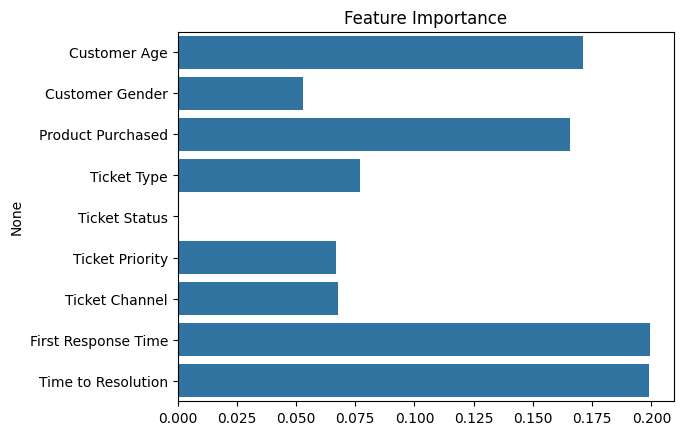

In [ ]:
importances = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()
